1)Extract

In [ ]:
!unzip '/content/Flowers_Dataset.zip'

2)Image Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [6]:
test_datagen=ImageDataGenerator(rescale=1./255)

Load Data

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/Flowers/Training",target_size=(64,64),class_mode='categorical',batch_size=24)

In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/Flowers/Testing",target_size=(64,64),class_mode='categorical',batch_size=24)

In [ ]:
x_train.class_indices

In [ ]:
x_test.class_indices

3)Create Model

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [13]:
model=Sequential()

4)Add Layers

a)Convolution Layer

In [14]:
model.add(Convolution2D(32,(3,3),kernel_initializer="random_uniform",activation="relu",strides=(1,1),input_shape=(64,64,3)))

b)MaxPooling Layer

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

c)Flatten

In [16]:
model.add(Flatten())

d)Dense(Hidden layer)

In [17]:
model.add(Dense(300,activation="relu"))

In [18]:
model.add(Dense(300,activation="relu"))

e)Output layer

In [19]:
model.add(Dense(5,activation="softmax"))

5)Compile the model

In [20]:
model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer='adam')

6)Fit the model

In [ ]:
model.fit(x_train,epochs=5,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

7)Save the model

In [31]:
model.save("Flowers.h5")

8)Test the model

In [24]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model=load_model("Flowers.h5")

In [50]:
img=image.load_img(r"/content/Flowers/Testing/sunflower/1008566138_6927679c8a.jpg",target_size=(64,64))

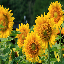

In [51]:
img

In [52]:
x=image.img_to_array(img)

In [53]:
x=np.expand_dims(x,axis=0)

In [ ]:
pred=model.predict(x)

In [ ]:
pred

In [56]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
index[np.argmax(pred)]